# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [169]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [170]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [171]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:wheelchair_speed-e706:Initialising MQTT connection for Thing 'dcd:things:wheelchair_speed-e706'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:wheelchair_speed-e706:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706 HTTP/1.1" 200 6724


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:wheelchair_speed-e706', 'name': 'Wheelchair_speed', 'description': '', 'type': 'Speed', 'properties': [{'type': 'THREE_DIMENSIONS', 'name': 'My Random Property', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}], 'id': 'my-random-property-5f3c', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572263894644, 'registeredAt': 1571392699000}, {'type': 'ONE_DIMENSION', 'name': 'one', 'description': '', 'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}], 'id': 'one-28d7', 'classes': [], 'values': [], 'entityId': 'dcd:things:wheelchair_speed-e706', 'readAt': 1572263894644, 'registeredAt': 1571994791000}, {

What does a Thing look like?

In [172]:
my_thing.to_json()

{'id': 'dcd:things:wheelchair_speed-e706',
 'name': 'Wheelchair_speed',
 'description': '',
 'type': 'Speed',
 'properties': [{'id': 'my-random-property-5f3c',
   'name': 'My Random Property',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''}]},
  {'id': 'one-28d7',
   'name': 'one',
   'description': '',
   'type': 'ONE_DIMENSION',
   'dimensions': [{'name': 'Value', 'description': '', 'unit': ''}]},
  {'id': 'random-shit-aa03',
   'name': 'RANDOM SHIT',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Val

Which property do we want to explore and over which time frame?

In [173]:
from datetime import datetime, timedelta
now = datetime.now()
now_minus_10 = now + timedelta(minutes = -10)
# What dates?
START_DATE = datetime.strftime(now_minus_10, "%Y-%m-%d %H:%M:%S")
END_DATE = datetime.strftime(now, "%Y-%m-%d %H:%M:%S")

#from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [174]:
PROPERTY_NAME = "one"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:wheelchair_speed-e706/properties/one-28d7?from=1572263294000.0&to=1572263894000.0 HTTP/1.1" 200 17362


How many data point did we get?

In [175]:
print(len(my_property.values))

299


Display values

In [176]:
my_property.values

[[1572263295530, 0.284154],
 [1572263297534, 0.203448],
 [1572263299536, 0.577391],
 [1572263301541, 0.0246476],
 [1572263303545, 0.208632],
 [1572263305547, 0.73302],
 [1572263307552, 0.497543],
 [1572263309556, 0.180867],
 [1572263311559, 0.807159],
 [1572263313562, 0.938964],
 [1572263315564, 0.0325449],
 [1572263317565, 0.705058],
 [1572263319569, 0.511151],
 [1572263321571, 0.0530443],
 [1572263323577, 0.0421257],
 [1572263325583, 0.867713],
 [1572263327587, 0.399825],
 [1572263329591, 0.204258],
 [1572263331594, 0.595324],
 [1572263333597, 0.256769],
 [1572263335601, 0.590379],
 [1572263337606, 0.379572],
 [1572263339607, 0.626099],
 [1572263341609, 0.480144],
 [1572263343615, 0.445825],
 [1572263345617, 0.881593],
 [1572263347619, 0.820831],
 [1572263349625, 0.416592],
 [1572263351626, 0.558077],
 [1572263353628, 0.448651],
 [1572263355630, 0.252931],
 [1572263357631, 0.00122712],
 [1572263359634, 0.388582],
 [1572263361636, 0.0175575],
 [1572263363639, 0.762476],
 [157226336564

In [180]:
import pandas as pd
import os
data = my_property.values
df = pd.DataFrame(my_property.values, columns = ['time', 'velocity'])
df.to_csv('test.csv')
ct = datetime.now().strftime('%A %-d %B %Y')
print(ct)
nametag = 'workout '+ct+'.csv'
os.rename('test.csv', nametag)

Monday 28 October 2019


# From CSV

In [181]:
from numpy import genfromtxt
data = genfromtxt('workout Monday 28 October 2019.csv', delimiter=',')
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['x', 'y'])
data_frame

,x,y
NaT,NaN,NaN
1970-01-01 00:00:00.000,1.572263e+12,0.284154
1970-01-01 00:00:00.001,1.572263e+12,0.203448
1970-01-01 00:00:00.002,1.572263e+12,0.577391
1970-01-01 00:00:00.003,1.572263e+12,0.024648
...,...,...
1970-01-01 00:00:00.294,1.572264e+12,0.862981
1970-01-01 00:00:00.295,1.572264e+12,0.643675
1970-01-01 00:00:00.296,1.572264e+12,0.219544
1970-01-01 00:00:00.297,1.572264e+12,0.648536


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
data = np.array(my_property.values)

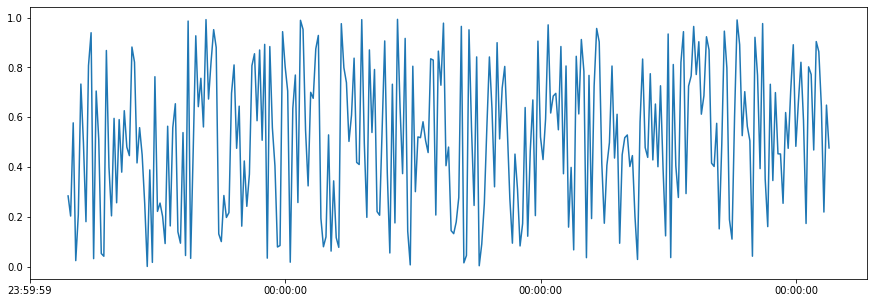

In [183]:
figure(num=None, figsize=(15, 5))
t = data_frame.index
#plt.plot(t, data_frame.x, t, data_frame.y)
plt.plot(t,data_frame.y)

In [184]:
#plt.hist(data[:,:])
#plt.show()

# Generate statistics with NumPy and Pandas

In [185]:
import numpy as np
from scipy.stats import kurtosis, skew

In [186]:
np.min(data[:,1:4], axis=0)

array([0.00122712])

In [187]:
skew(data[:,1:4])

array([-0.10779254])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [188]:
data[:10,1:]

array([[0.284154 ],
       [0.203448 ],
       [0.577391 ],
       [0.0246476],
       [0.208632 ],
       [0.73302  ],
       [0.497543 ],
       [0.180867 ],
       [0.807159 ],
       [0.938964 ]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [189]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0
count,299.000000
mean,0.516857
std,0.289322
min,0.001227
25%,0.255003
50%,0.520871
75%,0.771467
max,0.992637


In [190]:
data_frame.rolling(10).std()

,0
2019-10-28 11:48:15.530,NaN
2019-10-28 11:48:17.534,NaN
2019-10-28 11:48:19.536,NaN
2019-10-28 11:48:21.541,NaN
2019-10-28 11:48:23.545,NaN
...,...
2019-10-28 11:58:04.408,0.228123
2019-10-28 11:58:06.413,0.220343
2019-10-28 11:58:08.415,0.262415
2019-10-28 11:58:10.419,0.253693


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

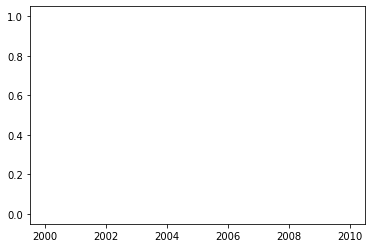

In [191]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

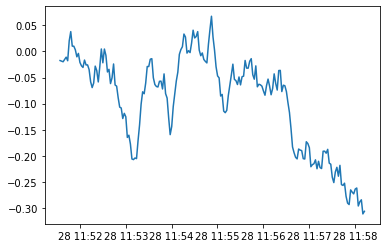

In [192]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

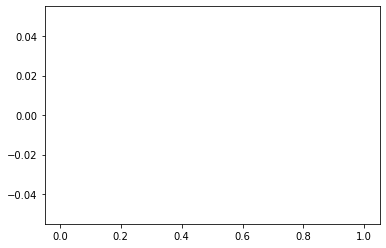

INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful
INFO:dcd:things:wheelchair_speed-e706:Connection successful


In [193]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions